In [33]:
import pandas as pd
import numpy as np 
import seaborn as sns
from seaborn import objects as so
from matplotlib import pyplot as plt

sns.set_style('darkgrid')

In [91]:
kaiwen_df = pd.read_csv('../data/AQAG_correct_incorrect_kaiwen.csv' , encoding='latin-1')[['chapter', 'section', 'subsection', 
                                                                                            'clean_text', 'type', 'question',
                                                                                            'question_score_kaiwen', 'correct_answer',
                                                                                            'correct_answer_score_kaiwen', 
                                                                                            'incorrect_answer', 'incorrect_answer_score_kaiwen', 
                                                                                            'notes_kaiwen']]
kaiwen_df['length'] = kaiwen_df['clean_text'].apply(lambda x: len(str(x)))
kaiwen_df=kaiwen_df[kaiwen_df['length'] > 50]

#print(kaiwen_df['clean_text'].value_counts())


print('Question Score')
print(kaiwen_df['question_score_kaiwen'].count(), kaiwen_df['question_score_kaiwen'].mean(), kaiwen_df['question_score_kaiwen'].std())
print('Correct Answer Score')
print(kaiwen_df['correct_answer_score_kaiwen'].count(),kaiwen_df['correct_answer_score_kaiwen'].mean(), kaiwen_df['correct_answer_score_kaiwen'].std())      
print('Incorrect Answer Score')
print(kaiwen_df['incorrect_answer_score_kaiwen'].count(), kaiwen_df['incorrect_answer_score_kaiwen'].mean(), kaiwen_df['incorrect_answer_score_kaiwen'].std())
      
kaiwen_df['question_score_kaiwen'] = kaiwen_df['question_score_kaiwen'].astype(str)
kaiwen_df['correct_answer_score_kaiwen'] = kaiwen_df['correct_answer_score_kaiwen'].astype(str)
kaiwen_df['incorrect_answer_score_kaiwen'] = kaiwen_df['incorrect_answer_score_kaiwen'].astype(str)

Question Score
303 1.495049504950495 0.5861044768691376
Correct Answer Score
303 0.9570957095709571 0.2186824198309518
Incorrect Answer Score
303 0.9604950495049505 0.19486305042034024


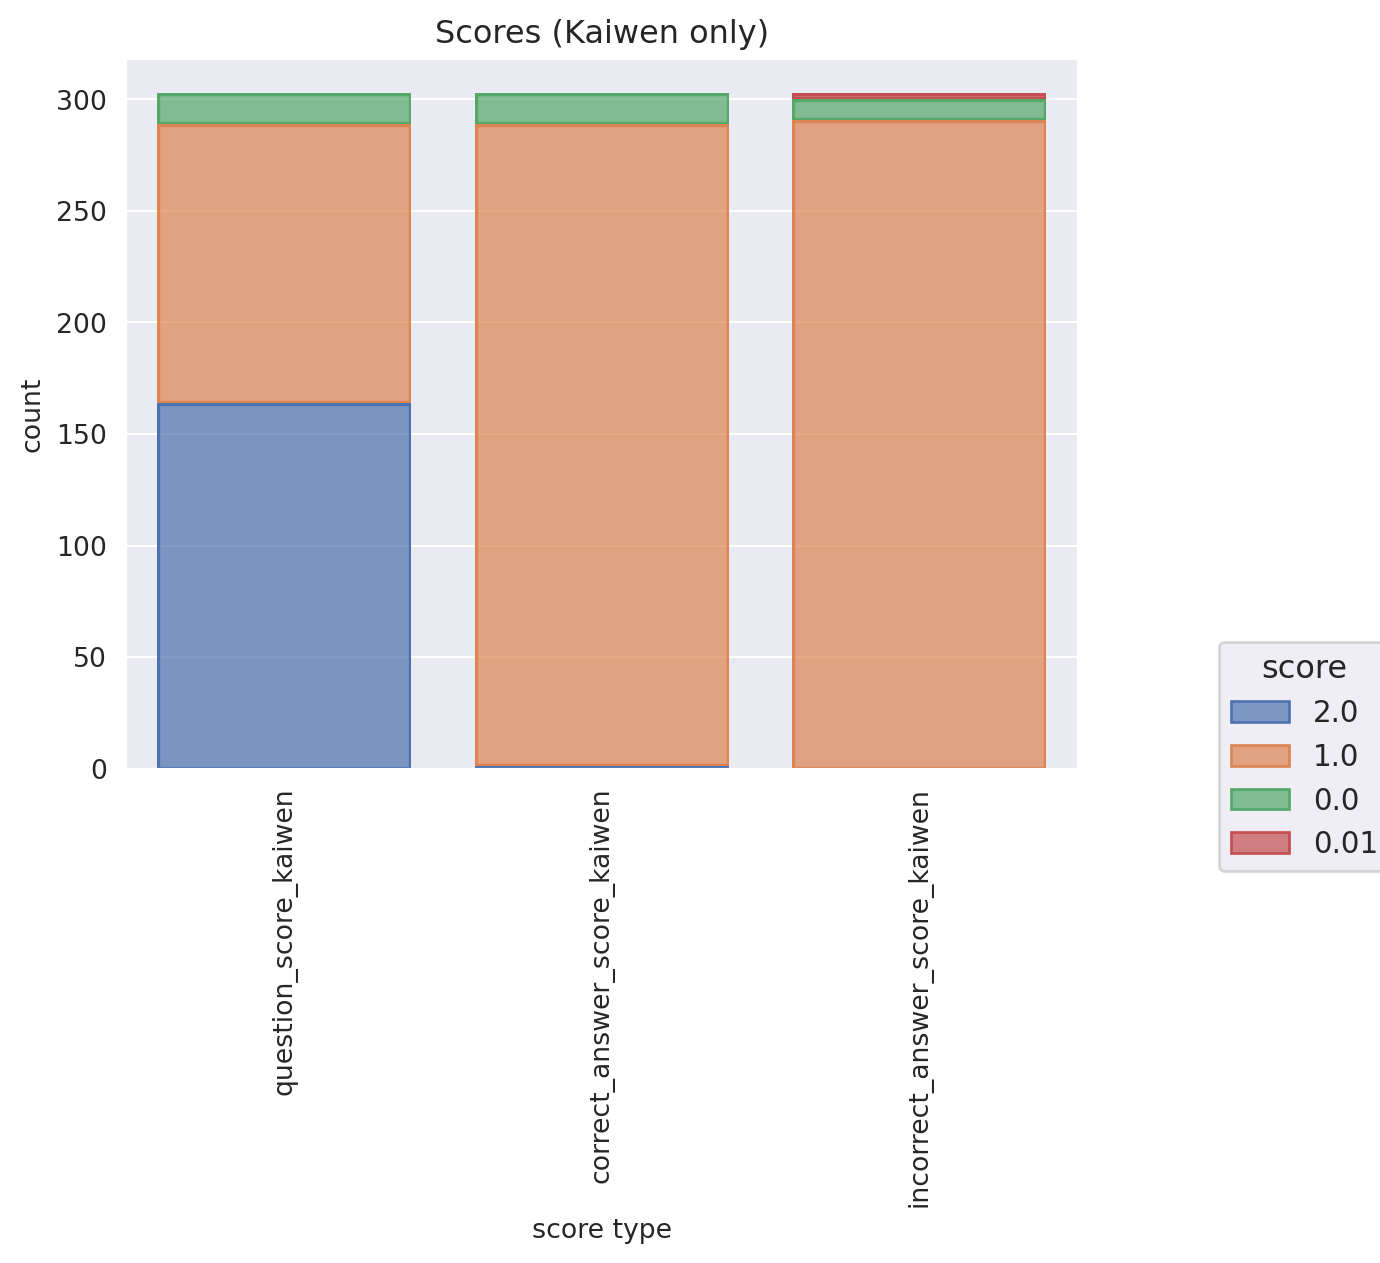

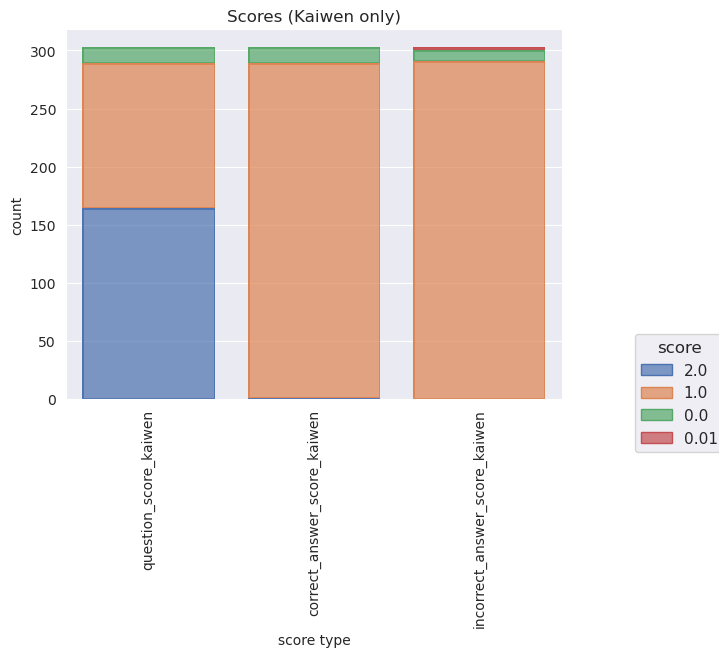

In [92]:
#sns.countplot(kaiwen_df[kaiwen_df['question_score_kaiwen']!='nan'], x='question_score_kaiwen', order = ['0.0', '1.0', '2.0']).Stack()
df1 = kaiwen_df[kaiwen_df['question_score_kaiwen'] != 'nan']
df1 = pd.melt(df1, id_vars=['question', 'correct_answer','incorrect_answer'], value_vars=['question_score_kaiwen','correct_answer_score_kaiwen', 'incorrect_answer_score_kaiwen'], 
              var_name='score_type', value_name='score', col_level=None, ignore_index=True)
df1

fig, ax = plt.subplots()
ax.xaxis.set_tick_params(rotation=90)

(
    so.Plot(df1, x="score_type", color="score")
    .add(so.Bar(), so.Count(), so.Stack())
    .label(title='Scores (Kaiwen only)',
          x='score type', y='count', rotation=90)
    .on(ax)
)